In [ ]:
!pip install streamlit


     |████████████████████████████████| 9.7 MB 13.9 MB/s 
     |████████████████████████████████| 111 kB 70.2 MB/s 
     |████████████████████████████████| 164 kB 57.5 MB/s 
     |████████████████████████████████| 4.3 MB 61.7 MB/s 
     |████████████████████████████████| 180 kB 73.3 MB/s 
     |████████████████████████████████| 76 kB 7.4 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 128 kB 75.5 MB/s 
     |████████████████████████████████| 792 kB 60.3 MB/s 
     |████████████████████████████████| 380 kB 70.9 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=16baddd6536978312d9ebe358111c936d7d96046a4000f27e2768e51e8d5a2a8
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt
!pwd 

Cloning into 'yolov5'...
remote: Enumerating objects: 10912, done.
remote: Total 10912 (delta 0), reused 0 (delta 0), pack-reused 10912
Receiving objects: 100% (10912/10912), 11.01 MiB | 1.29 MiB/s, done.
Resolving deltas: 100% (7541/7541), done.
/content/yolov5
     |████████████████████████████████| 596 kB 10.7 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
/content/yolov5


In [ ]:
import cv2
import numpy as np
# import streamlit as st
import tensorflow as tf
import torch
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:

def load_model(ckpt_path, conf=0.25, iou=0.50):
    '''loading model'''
    model = torch.hub.load('/content/yolov5',
                           'custom',
                           path=ckpt_path,
                           source='local',
                           force_reload=True)
    model.conf = conf 
    model.iou  = iou  # NMS IoU threshold
    model.classes = None   
    model.multi_label = False
    model.max_det = 1000 
    return model


def plot_img(img_arr):
  '''function take input as array and plot image'''
  plt.figure(figsize = (18, 8))
  plt.imshow(img_arr)
  plt.show()

def load_model(ckpt_path, conf=0.25, iou=0.50):
    '''loading model'''
    model = torch.hub.load('/content/yolov5',
                           'custom',
                           path=ckpt_path,
                           source='local',
                           force_reload=True)
    model.conf = conf 
    model.iou  = iou  # NMS IoU threshold
    model.classes = None   
    model.multi_label = False
    model.max_det = 1000 
    return model

def final(img_path , img_size ,augment=False):
  """function take input as image ,
      input image pass through model then with the help of output result yolo bounding box annotation
       function draw rectangle around COTS"""
  img=img=mpimg.imread(img_path) 
  results=model(img, size=img_size, augment=augment)
  preds = results.pandas().xyxy[0]

  for i in preds.index:
    xmin=int(preds["xmin"][i])
    ymin=int(preds["ymin"][i])
    xmax=int(preds["xmax"][i])
    ymax=int(preds["ymax"][i])
    img=cv2.rectangle(img, (xmin , ymin), (xmax , ymax), (255,0,0), 2)
    cv2.putText(img, 'COTS', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    # plot_img(img)
  return img
##############################################################################################

#loading yolo weights 
ckpt_path ="/content/best_gbrf_2048.pt"
model=load_model(ckpt_path, conf=0.25, iou=0.50)

2022-02-19 08:45:42.638 INFO    yolov5: requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
2022-02-19 08:45:45.039 INFO    yolov5: Requirement already satisfied: PyYAML>=5.3.1 in /usr/local/lib/python3.7/dist-packages (6.0)

2022-02-19 08:45:45.048 INFO    yolov5: requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

2022-02-19 08:45:45.141 INFO    yolov5: YOLOv5 🚀 v6.0-270-g0365379 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

2022-02-19 08:45:45.392 INFO    yolov5: Fusing layers... 
2022-02-19 08:45:45.605 INFO    yolov5: Model Summary: 280 layers, 12308200 parameters, 0 gradients, 16.2 GFLOPs
2022-02-19 08:45:45.609 INFO    yolov5: Adding AutoShape... 


In [ ]:
def final(img , img_size=2048 ,augment=False):
  """function take input as image ,
      input image pass through model then with the help of output result yolo bounding box annotation
       function draw rectangle around COTS"""
  # img=img=mpimg.imread(img_path) 
  results=model(img, size=img_size, augment=augment)
  preds = results.pandas().xyxy[0]

  for i in preds.index:
    xmin=int(preds["xmin"][i])
    ymin=int(preds["ymin"][i])
    xmax=int(preds["xmax"][i])
    ymax=int(preds["ymax"][i])
    img=cv2.rectangle(img, (xmin , ymin), (xmax , ymax), (255,0,0), 2)
    cv2.putText(img, 'COTS', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    # plot_img(img)
  return img

Populating the interactive namespace from numpy and matplotlib


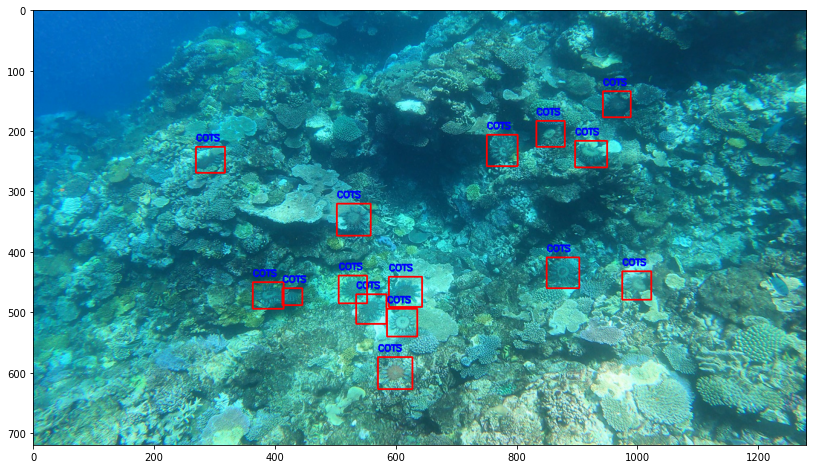

In [ ]:
img_path="/content/5751.jpg"
img=img=mpimg.imread(img_path) 
img = np.asarray(img)
img= final(img)
%pylab inline
plot_img(img)

In [ ]:
%%writefile app.py
import cv2
import numpy as np
import streamlit as st
import tensorflow as tf
import torch
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

##############################################################################################
def load_model(ckpt_path, conf=0.25, iou=0.50):
    '''loading model'''
    model = torch.hub.load('/content/yolov5',
                           'custom',
                           path=ckpt_path,
                           source='local',
                           force_reload=True)
    model.conf = conf 
    model.iou  = iou  # NMS IoU threshold
    model.classes = None   
    model.multi_label = False
    model.max_det = 1000 
    return model


def plot_img(img_arr):
  '''function take input as array and plot image'''
  plt.figure(figsize = (18, 8))
  plt.imshow(img_arr)
  plt.show()

def load_model(ckpt_path, conf=0.25, iou=0.50):
    '''loading model'''
    model = torch.hub.load('/content/yolov5',
                           'custom',
                           path=ckpt_path,
                           source='local',
                           force_reload=True)
    model.conf = conf 
    model.iou  = iou  # NMS IoU threshold
    model.classes = None   
    model.multi_label = False
    model.max_det = 1000 
    return model

def final(img , img_size=2048 ,augment=False):
  """function take input as image ,
      input image pass through model then with the help of output result yolo bounding box annotation
       function draw rectangle around COTS"""
  # img=img=mpimg.imread(img_path) 
  results=model(img, size=img_size, augment=augment)
  preds = results.pandas().xyxy[0]

  for i in preds.index:
    xmin=int(preds["xmin"][i])
    ymin=int(preds["ymin"][i])
    xmax=int(preds["xmax"][i])
    ymax=int(preds["ymax"][i])
    img=cv2.rectangle(img, (xmin , ymin), (xmax , ymax), (255,0,0), 2)
    cv2.putText(img, 'COTS', (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    # plot_img(img)
  return img
##############################################################################################

#loading yolo weights 
ckpt_path ="/content/best_gbrf_2048.pt"
model=load_model(ckpt_path, conf=0.25, iou=0.50)

##############################################################################################


st.title('GBRF deployment')

### load file
uploaded_file = st.file_uploader("Choose a image file", type="jpg")

if uploaded_file is not None:
  file_bytes= np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
  opencv_image = cv2.imdecode(file_bytes, 1)
  opencv_image = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
  st.write('Uploaded Image')
  st.image(opencv_image, channels="RGB")

  Genrate_pred = st.button("Generate Prediction")    
  if Genrate_pred:
      st.write('Predicting COTS in image....')
      resized = final(opencv_image)
      st.write('Predicted Output ')
      resized = cv2.resize(resized,(1280 ,720))
      st.image(resized, channels="RGB")


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

npx: installed 22 in 2.117s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.204.19.84:8501

your url is: https://angry-stingray-16.loca.lt
2022-02-19 09:53:33.277 YOLOv5 🚀 v6.0-270-g0365379 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

2022-02-19 09:53:37.307 Fusing layers... 
2022-02-19 09:53:37.546 Model Summary: 280 layers, 12308200 parameters, 0 gradients, 16.2 GFLOPs
2022-02-19 09:53:37.548 Adding AutoShape... 
2022-02-19 09:54:30.874 YOLOv5 🚀 v6.0-270-g0365379 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

2022-02-19 09:54:30.968 Fusing layers... 
2022-02-19 09:54:31.166 Model Summary: 280 layers, 12308200 parameters, 0 gradients, 16.2 GFLOPs
2022-02-19 09:54:31.168 Adding AutoShape... 
2022-02-19 09:54:40.944 YOLOv5 🚀 v6.0-270-g0365379 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

2022-02-19 09:54:41.034 Fusing layers... 
2022-02-19 09:54:41.242 Model Summary: 280 layers, 12308200 parameters, 0 gradien